In [452]:
import glob
import os
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt


# Modeling imports
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier

# Evaluation imports:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


# Data analysis:

In [453]:
# reading the training data
data = pd.read_csv('train.csv')
data.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## Some Information about the data:
* battery_power: Total energy a battery can store at a time
* blue: if the mobile is supported with bluetooth or not
* clock_speed: speed of mobile processor in executing commands
* dual_sim: has two SIM cards (1) or not (0)
* fc: front camera pixels
* four_g: has 4G support (1) or not (0)
* int_memory: internal memory (Gigabyte)
* m_dep: Mobile depth (cm)
* mobile_wt: wieght of mobile
* n_cores: cores number of microprocessor
* pc: primary camera mega pixels
* px_height: height of pixels resolution
* px_width:  width of pixels resolution
* ram: random access memory (Megabytes)
* sc_h: height of mobile screen(cm)
* sc_w: width of mobile screen(cm)
* talk_time: longest time that a single battery charge will last when you are constantly talking on the phone
* three_g: has 3G support (1) or not (0)
* touch_screen: has touch screen (1) or not (0)
* wifi: supported with WIFI (1) or not (0)
* price_range: the range of mobile price -> the target ... 3: Extremly high cost or  2: High cost  or  1: Medium cost  or 0: Low cost


In [345]:
def data_analysis(data):
    
    # The shape of the data
    print("The shape of the data set:")
    print(f"The data set consists of {data.shape[0]} rows and {data.shape[1]} columns.")
    
    print('\n***********************************************')
    # Missing Values Check
    print("The existence of missing values in each column:")
    print(data.isnull().any())
    
    print('\n***********************************************')
    # Info of the data
    print("General information about the data:")
    print(data.info())
    
    print('\n***********************************************')
    # Number of unique values in each column
    print("The number of unique values in each column:")
    print(data.nunique())

In [48]:
data_analysis(df)

The shape of the data set:
The data set consists of 3000 rows and 22 columns.

***********************************************
The existence of missing values in each column:
id                True
battery_power    False
blue             False
clock_speed      False
dual_sim         False
fc               False
four_g           False
int_memory       False
m_dep            False
mobile_wt        False
n_cores          False
pc               False
px_height        False
px_width         False
ram              False
sc_h             False
sc_w             False
talk_time        False
three_g          False
touch_screen     False
wifi             False
price_range       True
dtype: bool

***********************************************
General information about the data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 no

In [501]:
# # Concatenate the csv files to work on them
# # setting the path for joining multiple files
# files = os.path.join("C:\\Users\\lenovo\\Desktop\\Final project", "*.csv")

# # list of merged files returned
# files = glob.glob(files)

# # joining files with concat and read_csv
# dataf = pd.concat(map(pd.read_csv, files), ignore_index=True)
# dataf

In [49]:
df.isnull().sum()

id               2000
battery_power       0
blue                0
clock_speed         0
dual_sim            0
fc                  0
four_g              0
int_memory          0
m_dep               0
mobile_wt           0
n_cores             0
pc                  0
px_height           0
px_width            0
ram                 0
sc_h                0
sc_w                0
talk_time           0
three_g             0
touch_screen        0
wifi                0
price_range      1000
dtype: int64

# EDA:

In [502]:
cdf= data.copy()
cdf.head(2)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2


In [503]:
cdf.loc[(df['price_range'] ==0), 'price_range'] = 'Low'
cdf.loc[(df['price_range'] ==1), 'price_range'] = 'Medium'
cdf.loc[(df['price_range'] ==2), 'price_range'] = 'High'
cdf.loc[(df['price_range'] ==3), 'price_range'] = 'Extreme High'

In [504]:
cdf.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,Low
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,High
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,Extreme High
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,Low
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,Extreme High


### Price range:

Text(0, 0.5, 'Amount')

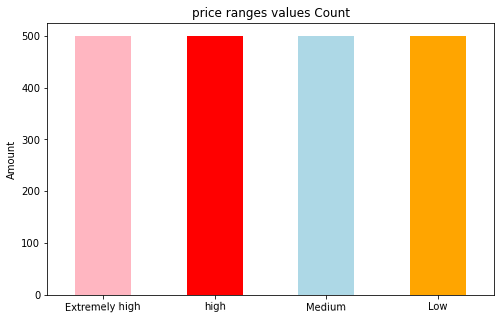

In [505]:
#plotting bar chart.
plt.figure(figsize=(8,5))
fig = cdf.price_range.value_counts().plot(kind = 'bar', color=['lightpink', "red", 'lightblue', 'orange'])
fig.set_xticklabels(labels=["Extremely high", 'high', 'Medium', 'Low'], rotation=0.9);
plt.title("price ranges values Count")
plt.ylabel("Amount")

<AxesSubplot:ylabel='price_range'>

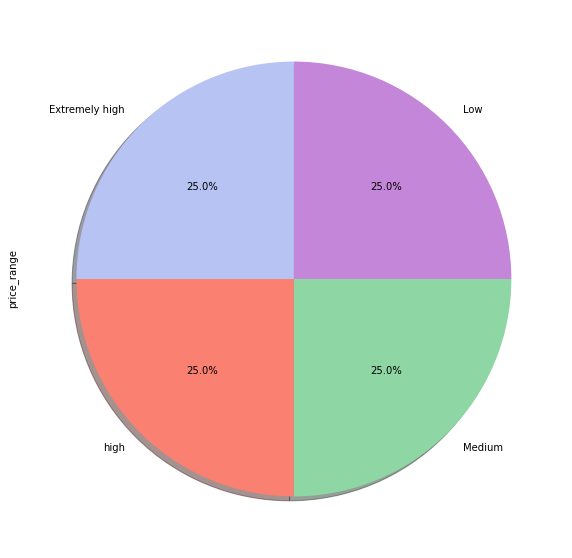

In [506]:
#visualizing in Pie chart
plt.figure(figsize=(10,10))
labels = "Extremely high", 'high', 'Medium', 'Low'

cdf['price_range'].value_counts().plot.pie( autopct='%1.1f%%', startangle = 90,  shadow=True, labels=labels, 
                                          colors=['#B7C3F3','salmon', '#8ED6A3', '#C486D8'])

### Price range & Battery Power:

<Figure size 1440x720 with 0 Axes>

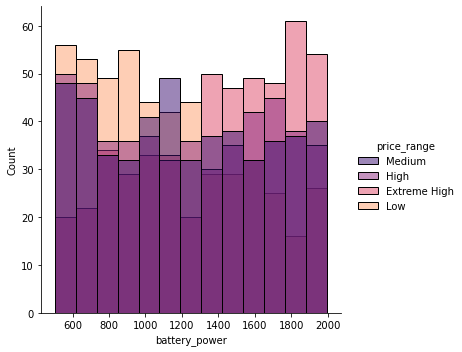

In [84]:
plt.figure(figsize=(20,10))
sns.displot(x='battery_power', hue='price_range', data=cdf, palette='magma')

In [508]:
# px.box(cdf,x='price_range',y='battery_power',
#        color='price_range',template='ggplot2',
#        labels={'price_range':'Price Range',
#                'battery_power':'Battery Power'},
#        title='<b>Battery power effect on price')

px.box(df,x='price_range',y='ram',
       color='price_range',template='ggplot2',
       labels={'price_range':'Price Range',
               'ram':'ram'},
       title="<b>Effect of Ram Capacity on Price")

### Price range & Bluetooth:

In [102]:
b = list(cdf['blue'].value_counts())
print(f"The number of Mobile phones with Bluetooth: {b[0]}")
print(f"The number of Mobile phones without Bluetooth: {b[1]}")

The number of Mobile phones with Bluetooth: 1506
The number of Mobile phones without Bluetooth: 1494


<AxesSubplot:ylabel='blue'>

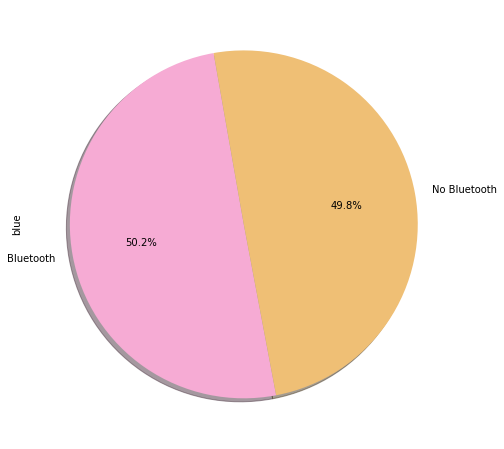

In [392]:
#visualizing in Pie chart
plt.figure(figsize=(10,8))
labels = "Bluetooth", "No Bluetooth"

cdf['blue'].value_counts().plot.pie( autopct='%1.1f%%', startangle = 100,  shadow=True, labels=labels, 
                                          colors=['#F6ABD4', '#EFBF75'])

Text(0.5, 0, 'Count')

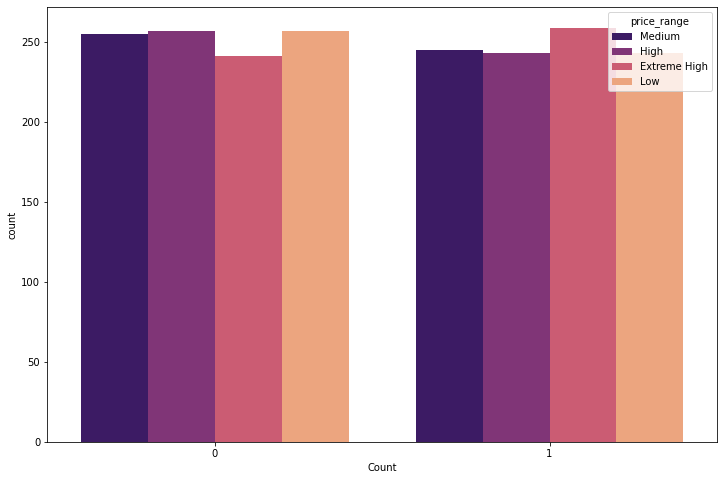

In [394]:
plt.figure(figsize=(12,8))
sns.countplot(data= cdf, x='blue', hue= 'price_range', palette= 'magma')
plt.xlabel('Bluetooth')
plt.xlabel('Count')

### Price range & Clock speed:

In [105]:
cdf['clock_speed'].value_counts()

0.5    612
2.8    118
0.6    114
1.6    113
2.1    113
2.5    110
1.4    109
1.3    106
2.3    106
2.9    100
2.6     95
1.8     94
1.5     94
1.9     93
0.7     92
2.0     92
0.9     92
2.4     91
1.7     90
2.7     88
2.2     88
0.8     87
1.0     87
1.1     84
1.2     83
3.0     49
Name: clock_speed, dtype: int64

<Figure size 1440x720 with 0 Axes>

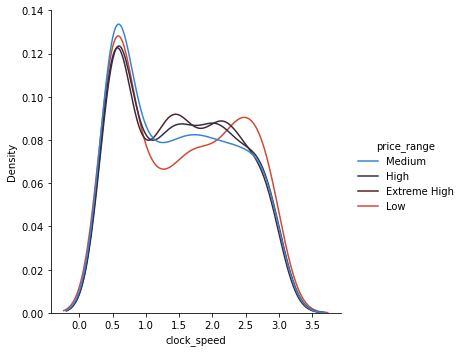

In [109]:
plt.figure(figsize=(20,10))
sns.displot(x='clock_speed', hue='price_range', data=cdf, palette='icefire', kind = 'kde')

## Price range & SIM cards:

In [126]:
s = list(cdf['dual_sim'].value_counts())
print(f"The number of Mobile phones with 2 SIM: {s[0]}")
print(f"The number of Mobile phones with 1 SIM: {s[1]}")

The number of Mobile phones with 2 SIM: 1536
The number of Mobile phones with 1 SIM: 1464


<AxesSubplot:ylabel='dual_sim'>

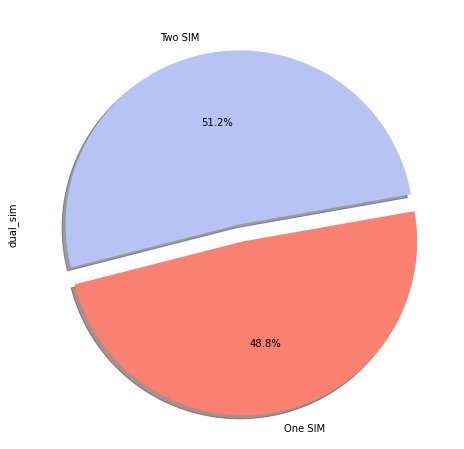

In [169]:
#visualizing in Pie chart
plt.figure(figsize=(10,8))
labels = "Two SIM", "One SIM"

cdf.dual_sim.value_counts().plot.pie( autopct='%1.1f%%', startangle = 10,  shadow=True, explode=[0,0.1], labels=labels, 
                                          colors=['#B7C3F3','salmon'])

Text(0, 0.5, 'Count')

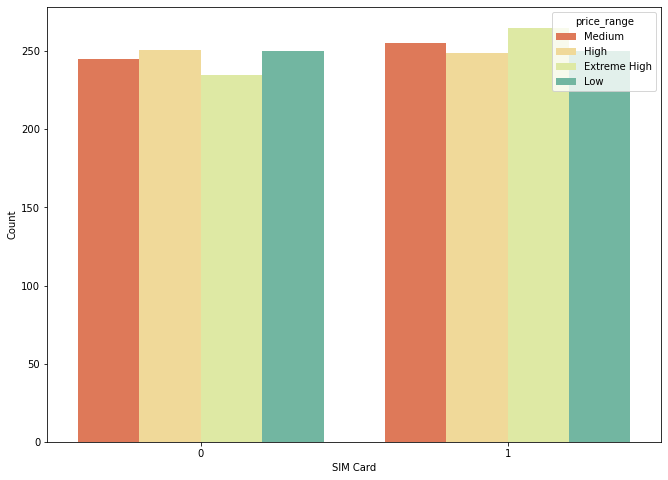

In [396]:
plt.figure(figsize=(11,8))
sns.countplot(data= cdf, x='dual_sim', hue= 'price_range', palette= 'Spectral')
plt.xlabel('SIM Card')
plt.ylabel('Count')

## Price range & front camera pixels

In [215]:
# cdf['fc'].value_counts()

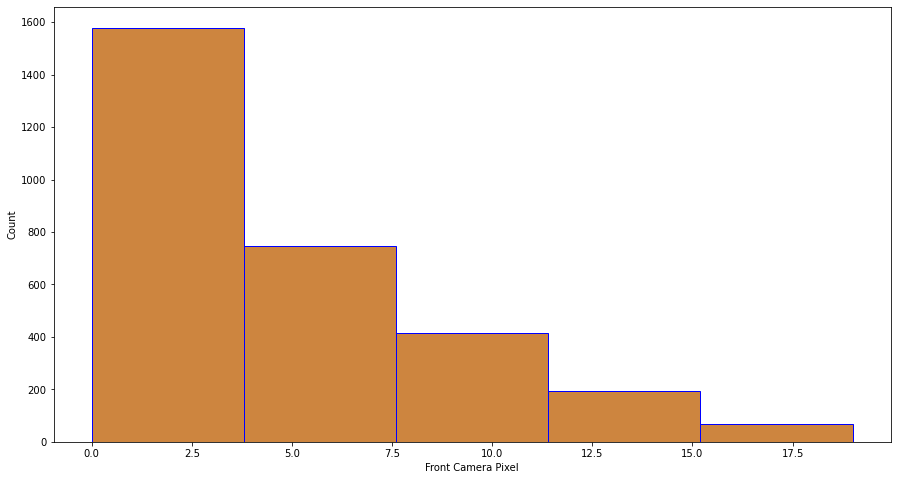

In [397]:
plt.figure(figsize=(15,8))
plt.hist(cdf['fc'], facecolor='peru', edgecolor= 'blue', bins= 5)
plt.xlabel('Front Camera Pixel')
plt.ylabel('Count')
plt.show()

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



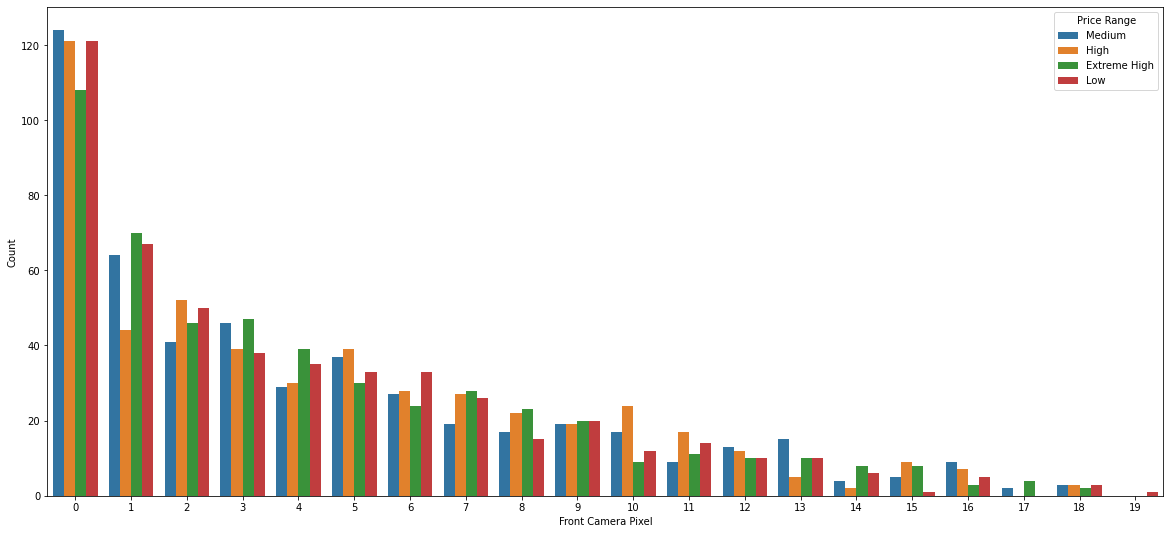

In [398]:
plt.figure(figsize=(20,9))
sns.countplot(cdf['fc'], hue=cdf['price_range'])
plt.xlabel('Front Camera Pixel')
plt.ylabel('Count')
plt.legend(loc='upper right', title='Price Range')

## Price range & 4G property:

In [164]:
g = list(cdf['four_g'].value_counts())
print(f"The number of Mobile phones with 4G property: {g[0]}")
print(f"The number of Mobile phones without 4G property: {g[1]}")

The number of Mobile phones with 4G property: 1530
The number of Mobile phones without 4G property: 1470


<AxesSubplot:ylabel='four_g'>

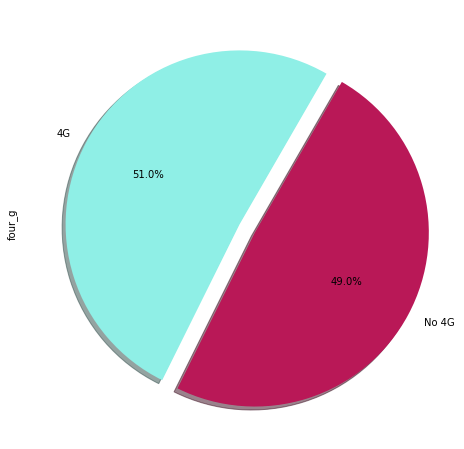

In [174]:
plt.Circle((0, 0), 0.35, fc= 'white')
plt.figure(figsize=(10,8))
labels = "4G", "No 4G"
cdf.four_g.value_counts().plot.pie( autopct='%1.1f%%', startangle = 60,  shadow=True, explode=[0,0.1], labels=labels, 
                                          colors=['#8FEFE6','#B91857'])

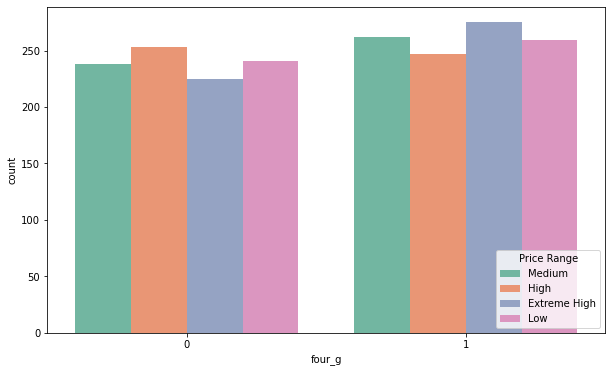

In [197]:
plt.figure(figsize=(10,6))
sns.countplot(data=cdf, x = 'four_g', hue='price_range', palette = 'Set2')
plt.legend(loc='lower right', title='Price Range')

## Price range & Internal memory:

In [212]:
# cdf['int_memory'].value_counts()

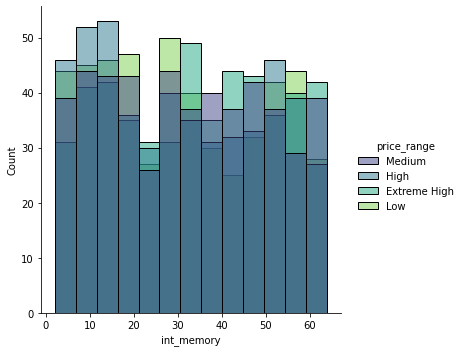

In [207]:
sns.displot(data=cdf, x='int_memory', hue='price_range', palette='viridis')

## Price range & Mobile depth & Mobile width:

In [233]:
# cdf['m_dep'].value_counts()
# cdf['mobile_wt'].min()
cdf['mobile_wt'].max()

200

<AxesSubplot:xlabel='m_dep', ylabel='count'>

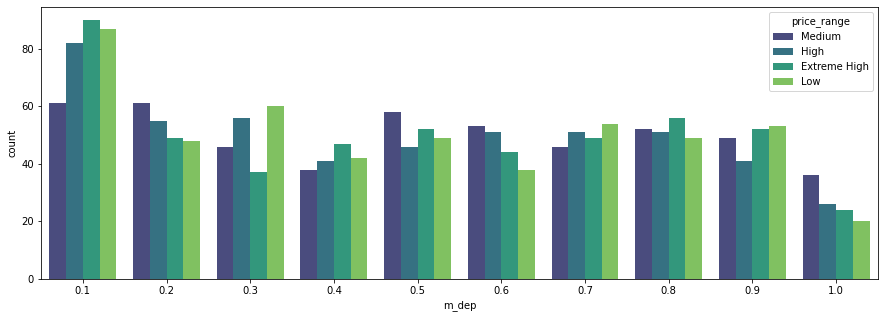

In [399]:
plt.figure(figsize=(15,5))
sns.countplot(data=cdf, x='m_dep',palette='viridis',  hue=cdf['price_range'])

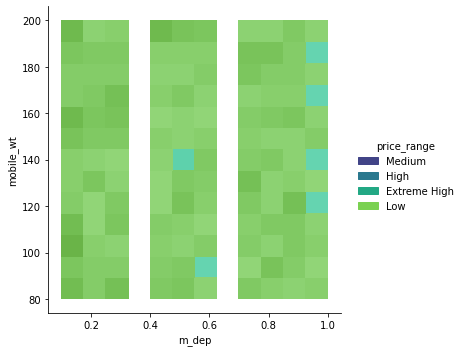

In [231]:
# plt.figure(figsize=(10,10))
sns.displot(data=cdf, x='m_dep', y='mobile_wt', palette='viridis', hue='price_range')

Text(0.5, 0, 'Mobile Width')

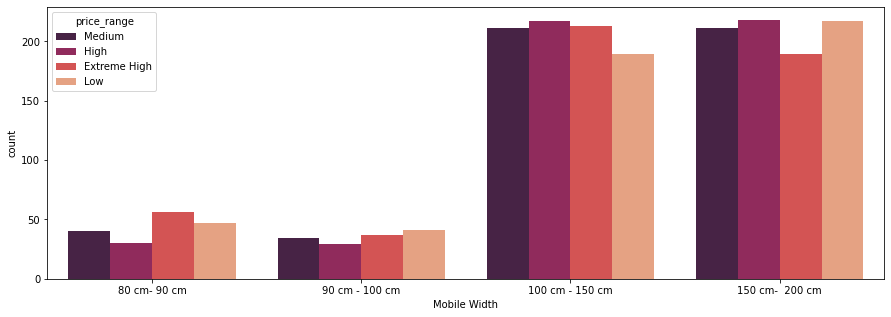

In [243]:
plt.figure(figsize=(15,5))
#Explore the Physical health problem feature
ph_bins = pd.cut(cdf["mobile_wt"],  bins=[80,90,100,150,np.inf],  labels=["80 cm- 90 cm","90 cm - 100 cm","100 cm - 150 cm","150 cm-  200 cm"])

sns.countplot(x = ph_bins, palette='rocket', hue=cdf['price_range'])
plt.xlabel('Mobile Width')

## Price range & Number of Micro cores:

In [247]:
cdf['n_cores'].value_counts()

4    416
2    381
1    380
8    377
5    376
3    373
7    366
6    331
Name: n_cores, dtype: int64

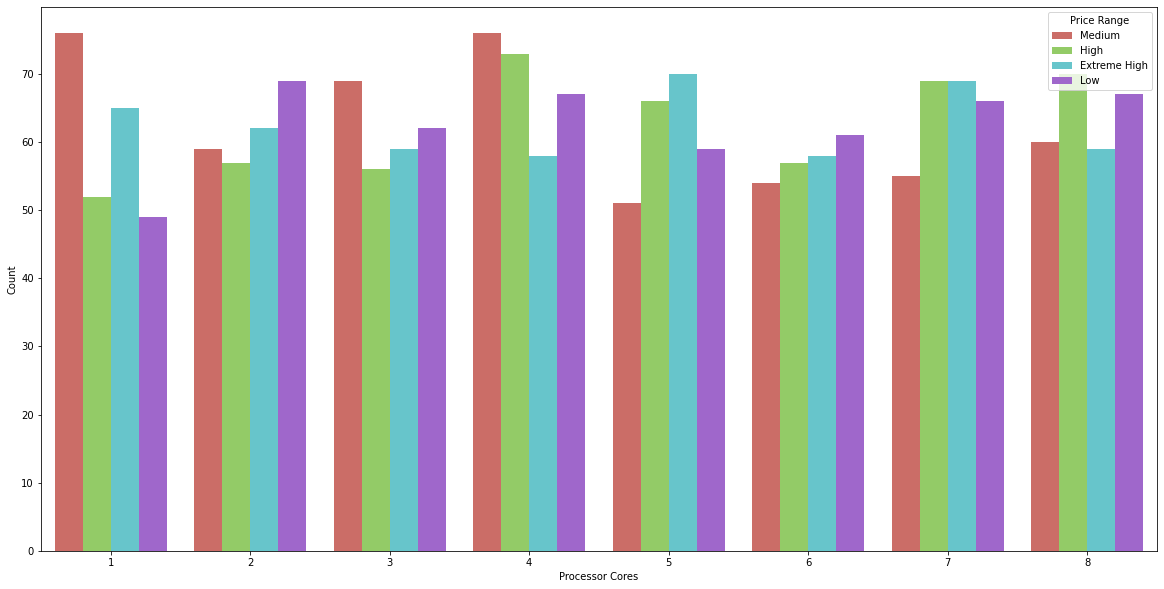

In [400]:
plt.figure(figsize=(20,10))
sns.countplot(data=cdf, x='n_cores',palette='hls', hue='price_range')
plt.xlabel('Processor Cores')
plt.ylabel('Count')
plt.legend(loc='upper right', title='Price Range')

## Price range & Primary camera  pixels:

In [279]:
# cdf['pc'].value_counts()
# cdf['pc'].max()

Text(0.5, 0, 'Primary Camera pixel')

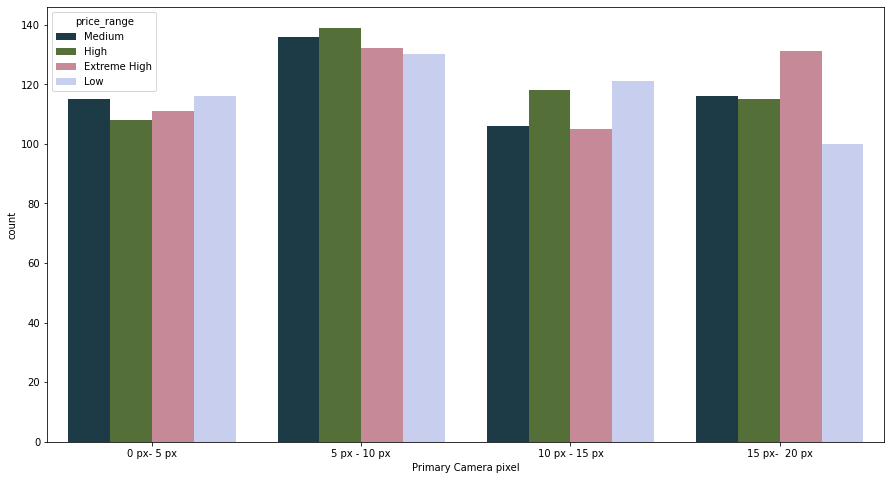

In [401]:
plt.figure(figsize=(15,8))
#Explore the Physical health problem feature
ph_bins = pd.cut(cdf["pc"],  bins=[0,5,10,15,np.inf],  labels=["0 px- 5 px","5 px - 10 px","10 px - 15 px","15 px-  20 px"])

sns.countplot(x = ph_bins, hue=cdf['price_range'], palette ='cubehelix')
plt.xlabel('Primary Camera pixel')

## Price range & Pixels resolution:

In [287]:
a= cdf['px_height'].max()
b= cdf['px_height'].min()
print(f'the max px height {a}')
print(f'the min px height {b}')

the max px height 1960
the min px height 0


In [288]:
x= cdf['px_width'].max()
y = cdf['px_width'].min()
print(f'the max px width {x}')
print(f'the min px width {y}')

the max px width 1998
the min px width 500


Text(7.06444444444444, 0.5, 'Pixels Height')

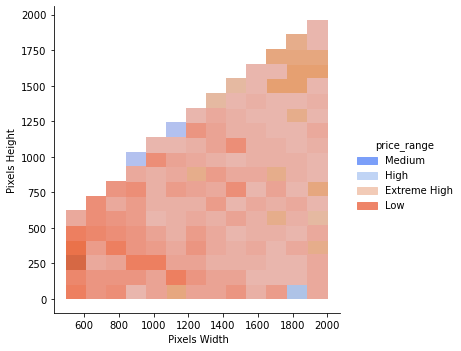

In [405]:
# plt.figure(figsize=(10,10))
sns.displot(data=cdf, x='px_width', y='px_height', palette='coolwarm', hue='price_range')
plt.xlabel(' Pixels Width')
plt.ylabel('Pixels Height')

## Price range & Memory:

In [293]:
h= cdf['ram'].max()
l= cdf['ram'].min()
print(f'the max px height {h}')
print(f'the min px height {l}')

the max px height 3998
the min px height 256


In [416]:
labels = {'price_range':'Price Range','ram':'Mobile Ram'}
px.box(cdf, x='price_range',y='ram', color='price_range', labels=labels, title="<b> The Effect of Ram Capacity on  Mobile Price")

## Price range & Screen dimensions:

In [313]:
hh= cdf['sc_h'].max()
lh= cdf['sc_h'].min()
print(f'the max screen height {hh}')
print(f'the min screen height {lh}')

the max screen height 19
the min screen height 5


In [314]:
hw= cdf['sc_w'].max()
lw = cdf['sc_w'].min()
print(f'the max screen height {hw}')
print(f'the min screen height {lw}')

the max screen height 18
the min screen height 0


In [309]:
labels = {'sc_h':'The screen height','sc_w':'The screen width'}
fig = px.scatter(cdf, x="sc_h", y="sc_w", color="price_range", title="<b> The Effect of the Screen Dimensions on the Mobile Price", labels =labels)
fig.show()

## Price range & Battery Life:

In [316]:
ht= cdf['talk_time'].max()
lt= cdf['talk_time'].min()
print(f'the longest time of charge {ht}')
print(f'the lowest time of charge {lt}')

the longest time of charge 20
the lowest time of charge 2


In [321]:
fig = px.bar(cdf, y='talk_time', x = 'price_range',
             color='price_range',
             labels={'talk_time':'Battery life after talking for a long time', 'price_range':'Price Range'})
fig.show()

## Price range & 3G Property:

<AxesSubplot:ylabel='three_g'>

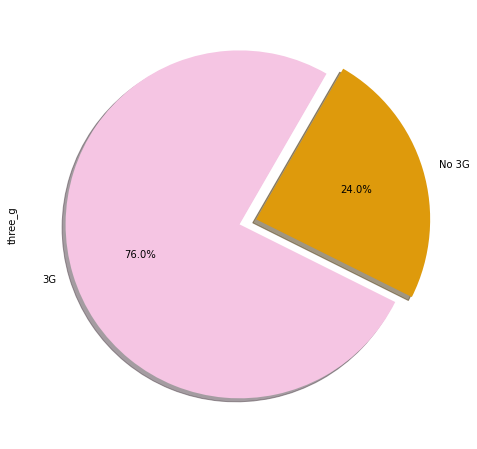

In [343]:
plt.Circle((0, 0), 0.35, fc= 'white')
plt.figure(figsize=(10,8))
labels = "3G", "No 3G"
cdf.three_g.value_counts().plot.pie( autopct='%1.1f%%', startangle = 60,  shadow=True, explode=[0,0.1], labels=labels, 
                                          colors=['#F5C5E3','#DE9A0C'])

In [338]:
cdf.loc[(df['three_g'] ==1), 'three_g'] = '3G'
cdf.loc[(df['three_g'] ==0), 'three_g'] = 'No 3G'

cdf.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1.0,1043,1,1.8,1,14,0,5,0.1,193,...,226,1412,3476,12,7,2,3G,1,0,NaN
1,2.0,841,1,0.5,1,4,1,61,0.8,191,...,746,857,3895,6,0,7,No 3G,0,0,NaN
2,3.0,1807,1,2.8,0,1,0,27,0.9,186,...,1270,1366,2396,17,10,10,3G,1,1,NaN
3,4.0,1546,0,0.5,1,18,1,25,0.5,96,...,295,1752,3893,10,0,7,No 3G,1,0,NaN
4,5.0,1434,0,1.4,0,11,1,49,0.5,108,...,749,810,1773,15,8,7,No 3G,0,1,NaN


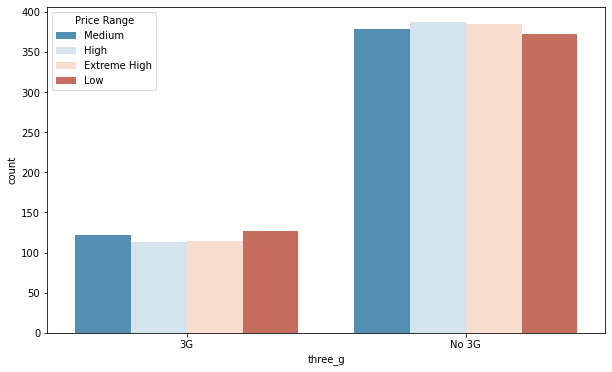

In [342]:
plt.figure(figsize=(10,6))
sns.countplot(data=cdf, x = 'three_g', hue='price_range', palette = 'RdBu_r')
plt.legend(loc='upper left', title='Price Range')

## Price range & Touch Screen:

In [358]:
cdf.loc[(df['touch_screen'] ==1), 'touch_screen'] = 'Touch Screen'
cdf.loc[(df['touch_screen'] ==0), 'touch_screen'] = 'No Touch Screen'
# cdf.head()

In [351]:
cdf['touch_screen'].value_counts()

Touch Screen       1506
No Touch Screen    1494
Name: touch_screen, dtype: int64

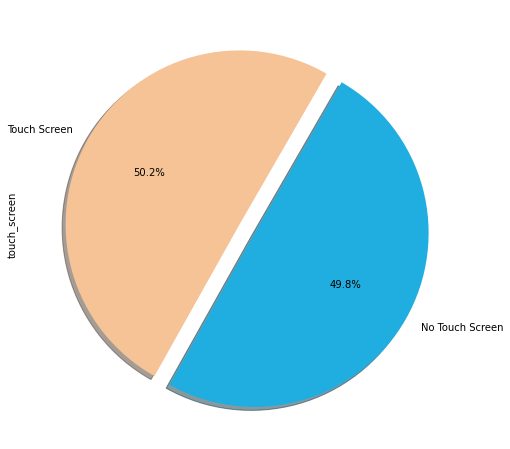

In [362]:
plt.figure(figsize=(10,8))
labels = "Touch Screen", "No Touch Screen"
cdf.touch_screen.value_counts().plot.pie( autopct='%1.1f%%', startangle = 60,  shadow=True, explode=[0,0.1], labels=labels, 
                                          colors=['#F5C396','#20AEE0'])
plt.Circle((0, 0), 0.35, fc= 'white')

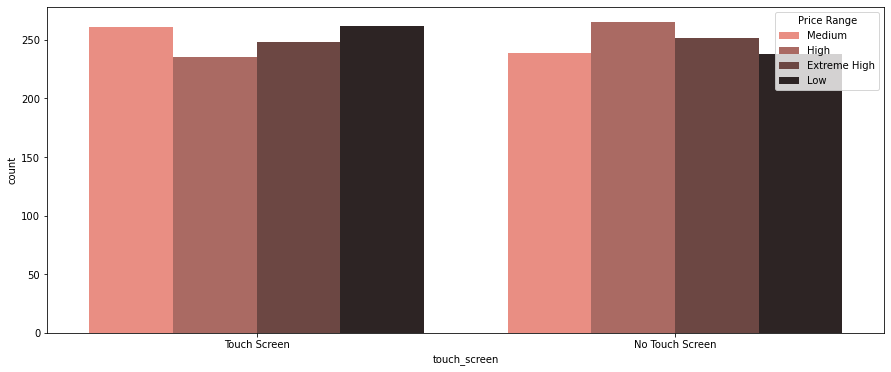

In [359]:
plt.figure(figsize=(15,6))
sns.countplot(data=cdf, x = 'touch_screen', hue='price_range', palette = 'dark:salmon_r')
plt.legend(loc='upper right', title='Price Range')

## Price range & WIFI Property:

In [365]:
cdf['wifi'].value_counts()

1    1521
0    1479
Name: wifi, dtype: int64

<AxesSubplot:ylabel='wifi'>

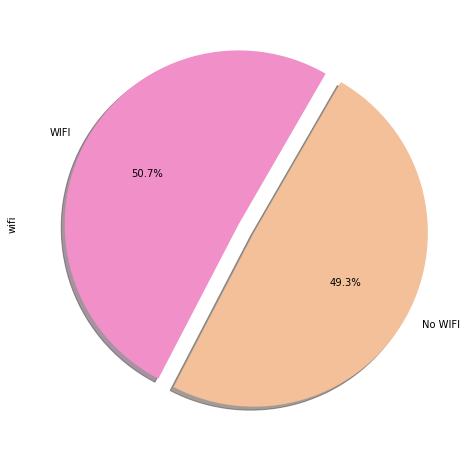

In [374]:
plt.figure(figsize=(10,8))
labels = "WIFI", "No WIFI"
cdf.wifi.value_counts().plot.pie( autopct='%1.1f%%', startangle = 60,  shadow=True, explode=[0,0.1], labels=labels, 
                                          colors=['#F18FC9','#F3C09A'])

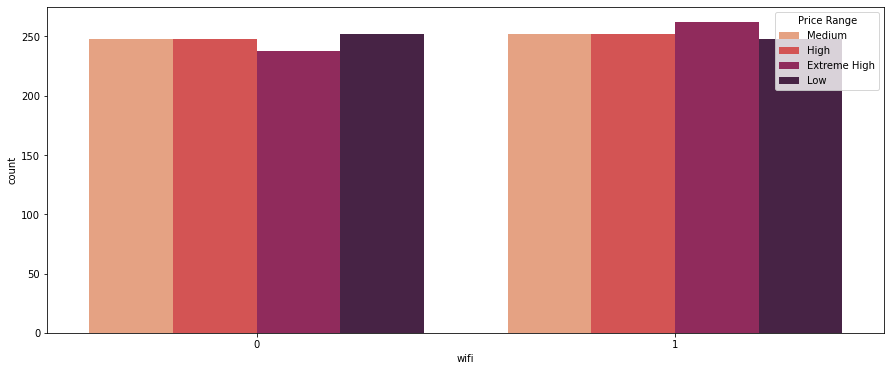

In [373]:
plt.figure(figsize=(15,6))
sns.countplot(data=cdf, x = 'wifi', hue='price_range', palette = 'rocket_r')
plt.legend(loc='upper right', title='Price Range')

## EDA Conclusion:
- The internal memory of the mobiles in the data starts from 44 -> 59 Gb
- The deph of the mobiles in the data starts from 0.1 -> 1 cm
- The Front camera pixels of the mobiles in the data starts from 0 -> 19 px
- The width of the mobiles in the data starts from 80 -> 200 cm
- The cores of the mobiles in the data starts from 1 -> 8 cores 
- The Primary camera  pixels of the mobiles in the data starts from 0 -> 20 cores 
- The pixels Height of the mobiles in the data starts from 0 -> 1960 px
- The pixels Width of the mobiles in the data starts from 500 -> 1998 px
- The screen height of the mobiles in the data ranges between 5 -> 19 cm
#### Phone memory refers to RAM (Random Access Memory) where it is a part of the phone used to store the operating system (OS) and where apps and data currently in use are kept. Whereas, phone storage is used to store data such as apps, photos, videos, and files that are necessary for the phone to run.
 - The Memory of the mobiles in the data starts from 256 -> 3998 Mb


# 2. Data Preprocessing:

### Missing data handling:

In [376]:
# processing of target vaeiable
fill_list = df['price_range'].dropna().tolist() 
df['price_range'] = df['price_range'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))

In [377]:
df.head(5)

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1.0,1043,1,1.8,1,14,0,5,0.1,193,...,226,1412,3476,12,7,2,0,1,0,2.0
1,2.0,841,1,0.5,1,4,1,61,0.8,191,...,746,857,3895,6,0,7,1,0,0,2.0
2,3.0,1807,1,2.8,0,1,0,27,0.9,186,...,1270,1366,2396,17,10,10,0,1,1,3.0
3,4.0,1546,0,0.5,1,18,1,25,0.5,96,...,295,1752,3893,10,0,7,1,1,0,0.0
4,5.0,1434,0,1.4,0,11,1,49,0.5,108,...,749,810,1773,15,8,7,1,0,1,2.0


### Outliers:

id                  AxesSubplot(0.125,0.772143;0.168478x0.107857)
battery_power    AxesSubplot(0.327174,0.772143;0.168478x0.107857)
blue             AxesSubplot(0.529348,0.772143;0.168478x0.107857)
clock_speed      AxesSubplot(0.731522,0.772143;0.168478x0.107857)
dual_sim            AxesSubplot(0.125,0.642714;0.168478x0.107857)
fc               AxesSubplot(0.327174,0.642714;0.168478x0.107857)
four_g           AxesSubplot(0.529348,0.642714;0.168478x0.107857)
int_memory       AxesSubplot(0.731522,0.642714;0.168478x0.107857)
m_dep               AxesSubplot(0.125,0.513286;0.168478x0.107857)
mobile_wt        AxesSubplot(0.327174,0.513286;0.168478x0.107857)
n_cores          AxesSubplot(0.529348,0.513286;0.168478x0.107857)
pc               AxesSubplot(0.731522,0.513286;0.168478x0.107857)
px_height           AxesSubplot(0.125,0.383857;0.168478x0.107857)
px_width         AxesSubplot(0.327174,0.383857;0.168478x0.107857)
ram              AxesSubplot(0.529348,0.383857;0.168478x0.107857)
sc_h      

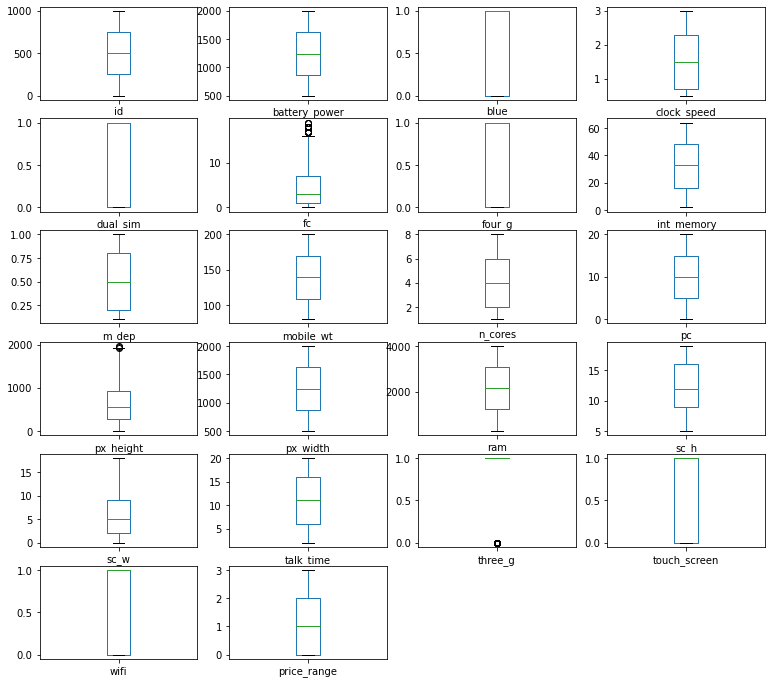

In [384]:
df.plot(kind="box", subplots=True, layout=(6,4), figsize=(13,12))

### Correlation:

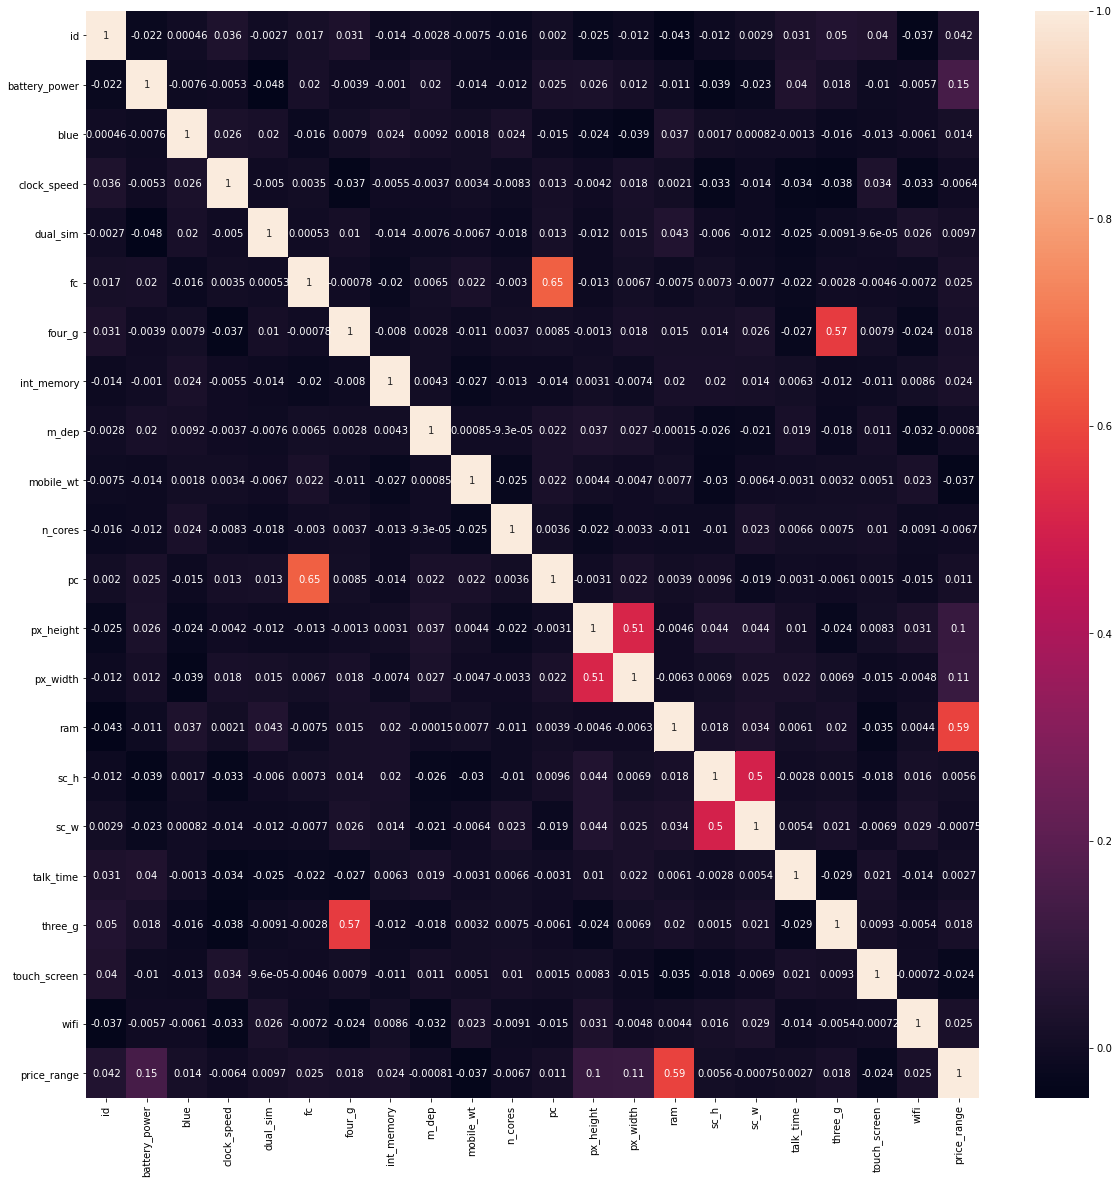

In [378]:
# Heatmap
corr_matrix = df.corr()
plt.figure(figsize = (20,20))
sns_plot=sns.heatmap(corr_matrix,annot=True)
plt.show()

<AxesSubplot:>

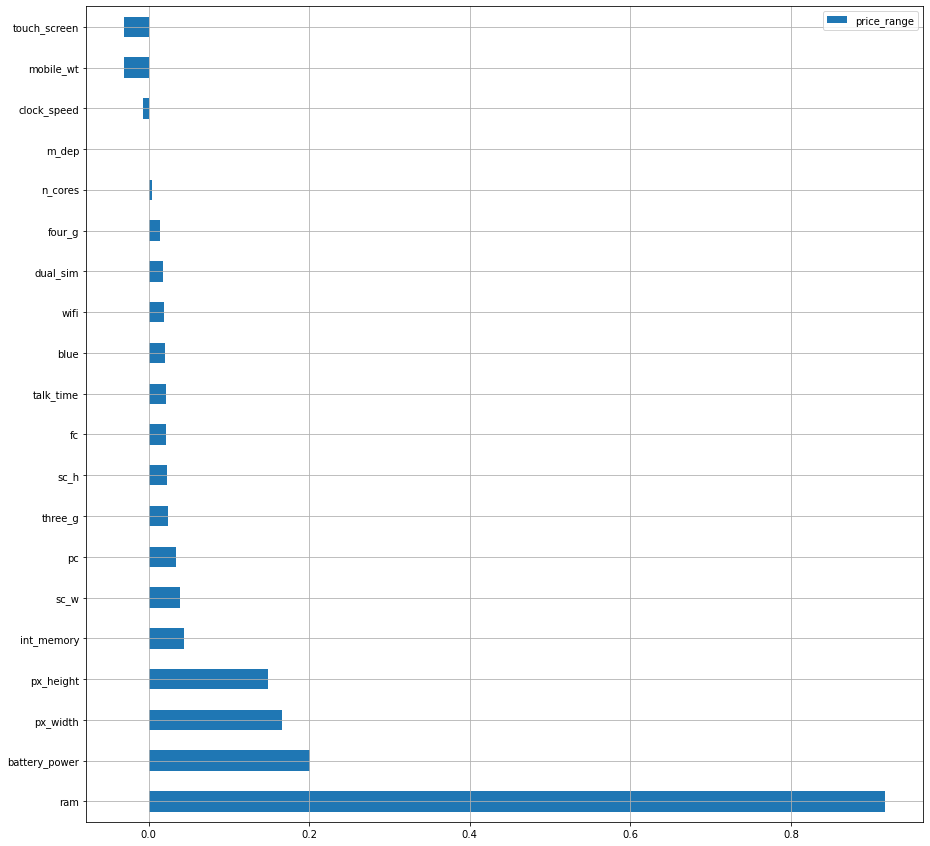

In [427]:
#Correlation check to price Ranges
corr = pd.DataFrame(df.corr()['price_range']).drop('price_range',axis=0).sort_values(by = 'price_range',ascending=False)
corr.plot(kind='barh',grid=True,figsize=(15,15))

In [454]:
df = data.copy()

In [455]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [456]:
df.shape

(2000, 21)

In [457]:
# remove the variables with low correlation with the target variable
# most of the removed feature will not be a big deal in choosing the mobile    
df = df.drop(['clock_speed'], axis=1)     
df = df.drop(['n_cores'], axis=1)  
df = df.drop(['m_dep'], axis=1)  
df.columns

Index(['battery_power', 'blue', 'dual_sim', 'fc', 'four_g', 'int_memory',
       'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w',
       'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [458]:
df.shape

(2000, 18)

# 3. Modelling:

#### Needed Functions:

In [477]:
# Function to plot the confusion matrix:
def cmatrix_fun(model_name, actual, predicted, color):
    # check the confusion matrix
    cm = confusion_matrix(actual, predicted) 
    print(cm)

    # Plot the CM
    ax = sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap=color)

    ax.set_title(f'The confusion matrix using {model_name} Classifier \n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

#     # Ticket labels - List must be in alphabetical order
#     ax.xaxis.set_ticklabels(['False','True'])
#     ax.yaxis.set_ticklabels(['False','True'])
    
# Function to check the classification report
def classification_report_fun(model_name, actual, predicted):
    print(f'The Classification Report for {model_name} Classifier:')
    print(classification_report(actual, predicted))    


## Data Splitting:

In [460]:
# extract x, y values for the model
x= df.drop(["price_range"], axis=1).values
y= df['price_range'].values

## Scaling the data:

In [461]:
# import Robust Scaler library
from sklearn.preprocessing import RobustScaler

ro_scaler = RobustScaler()
# fit the modeling features to the scaler
x = ro_scaler.fit_transform(x)

x.shape

(2000, 17)

## Splitting to train and test:

In [462]:
# import split library
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

x_train.shape

(1400, 17)

### Random Forest Modelling:

In [463]:
from sklearn.ensemble import RandomForestClassifier

In [464]:
rf_clf = RandomForestClassifier(criterion='entropy',n_estimators=20)

In [465]:
# Fit the parameters before oversampling:
rf_clf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=20)

In [466]:
#predict
y_pred_test_rf = rf_clf.predict(x_test)
y_pred_train_rf = rf_clf.predict(x_train)

In [467]:
RfTrainAcc = round(accuracy_score(y_train , y_pred_train_rf)*100 , 2)
RfTestAcc = round(accuracy_score(y_test , y_pred_test_rf)*100 , 2)

print(f'Accuracy of Train before sampling: {RfTrainAcc}')
print(f'Accuracy of  Test before sampling: {RfTestAcc}')

Accuracy of Train before sampling: 100.0
Accuracy of  Test before sampling: 88.33


[[140  11   0   0]
 [  7 135   4   0]
 [  0  21 118   9]
 [  0   0  18 137]]


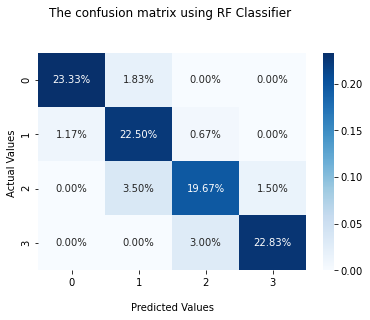

In [478]:
cmatrix_fun('RF', y_test, y_pred_test_rf, 'Blues')

In [470]:
classification_report_fun('RF',  y_test, y_pred_test_rf)

The Classification Report for RF Classifier:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       151
           1       0.81      0.92      0.86       146
           2       0.84      0.80      0.82       148
           3       0.94      0.88      0.91       155

    accuracy                           0.88       600
   macro avg       0.89      0.88      0.88       600
weighted avg       0.89      0.88      0.88       600



### Linear Regression:

In [471]:
# import
from sklearn.linear_model import LogisticRegression

In [472]:
# Applying LogisticRegression Model 
LogisticRegressionModel = LogisticRegression(penalty = 'l2', solver = 'sag', C = 1, random_state = 33)

In [473]:
# Without Sampling
LogisticRegressionModel.fit(x_train, y_train)

LogisticRegression(C=1, random_state=33, solver='sag')

In [474]:
#predict
y_pred_test_lr = LogisticRegressionModel.predict(x_test)
y_pred_train_lr = LogisticRegressionModel.predict(x_train)

In [475]:
LrTrainAcc = round(accuracy_score(y_train , y_pred_train_lr)*100 , 2)
LrTestAcc = round(accuracy_score(y_test , y_pred_test_lr)*100 , 2)

print(f'Accuracy of Train before sampling: {LrTrainAcc}')
print(f'Accuracy of  Test before sampling: {LrTestAcc}')

Accuracy of Train before sampling: 97.0
Accuracy of  Test before sampling: 96.67


[[144   7   0   0]
 [  3 143   0   0]
 [  0   4 139   5]
 [  0   0   1 154]]


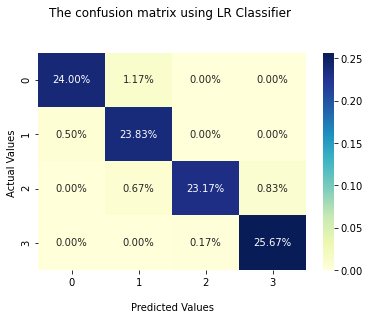

In [479]:
cmatrix_fun('LR', y_test, y_pred_test_lr, 'YlGnBu')

### KNN:

In [480]:
from sklearn.neighbors import KNeighborsClassifier

In [481]:
# Applying KNeighborsClassifier Model 
KNNClassifierModel = KNeighborsClassifier(n_neighbors = 7)

In [482]:
# Without Sampling
KNNClassifierModel.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [483]:
#predict
y_pred_test_knn = KNNClassifierModel.predict(x_test)
y_pred_train_knn = KNNClassifierModel.predict(x_train)

In [484]:
# with NearMiss undersampling
KNNClassifierModel.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [485]:
#predict
y_pred_test_knn = KNNClassifierModel.predict(x_test)
y_pred_train_knn = KNNClassifierModel.predict(x_train)

In [486]:
KnnTrainAcc = round(accuracy_score(y_train , y_pred_train_knn)*100 , 2)
KnnTestAcc = round(accuracy_score(y_test , y_pred_test_knn)*100 , 2)

print(f'Accuracy of Train before sampling: {KnnTrainAcc}')
print(f'Accuracy of  Test before sampling: {KnnTestAcc}')

Accuracy of Train before sampling: 69.43
Accuracy of  Test before sampling: 53.83


[[106  42   3   0]
 [ 45  70  26   5]
 [ 16  55  51  26]
 [  1  11  47  96]]


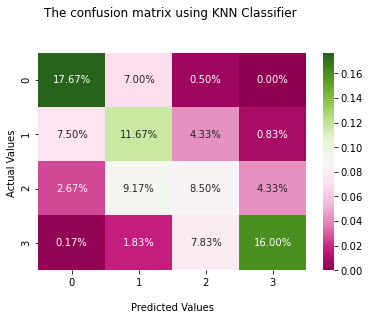

In [487]:
cmatrix_fun('KNN', y_test, y_pred_test_knn,'PiYG')

In [488]:
classification_report_fun("KNN", y_test, y_pred_test_knn)

The Classification Report for KNN Classifier:
              precision    recall  f1-score   support

           0       0.63      0.70      0.66       151
           1       0.39      0.48      0.43       146
           2       0.40      0.34      0.37       148
           3       0.76      0.62      0.68       155

    accuracy                           0.54       600
   macro avg       0.55      0.54      0.54       600
weighted avg       0.55      0.54      0.54       600



### XGB:

In [489]:
from xgboost import XGBClassifier

In [490]:
xgb = XGBClassifier()

In [492]:
# Without Sampling
xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [494]:
#predict
y_pred_test_xgb = xgb.predict(x_test)
y_pred_train_xgb = xgb.predict(x_train)

In [495]:
XgbTrainAcc = round(accuracy_score(y_train , y_pred_train_xgb)*100 , 2)
XgbTestAcc = round(accuracy_score(y_test , y_pred_test_xgb)*100 , 2)

print(f'Accuracy of Train before sampling: {XgbTrainAcc}')
print(f'Accuracy of  Test before sampling: {XgbTestAcc}')

Accuracy of Train before sampling: 100.0
Accuracy of  Test before sampling: 91.33


[[143   8   0   0]
 [  5 134   7   0]
 [  0  12 125  11]
 [  0   0   9 146]]


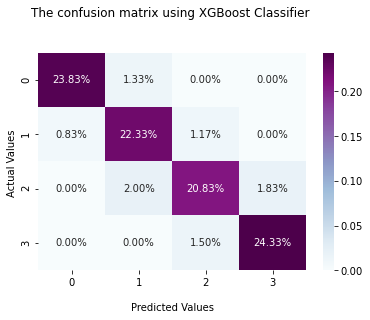

In [496]:
cmatrix_fun("XGBoost", y_test, y_pred_test_xgb, 'BuPu')

In [497]:
classification_report_fun("XGBoost", y_test, y_pred_test_xgb)

The Classification Report for XGBoost Classifier:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       151
           1       0.87      0.92      0.89       146
           2       0.89      0.84      0.87       148
           3       0.93      0.94      0.94       155

    accuracy                           0.91       600
   macro avg       0.91      0.91      0.91       600
weighted avg       0.91      0.91      0.91       600

